In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from astropy.io import ascii 
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
ourdata = pd.read_csv('data/measured_rps.csv') 

In [3]:
ourdata

,tic,period
0,141526439,15.630803
1,141527965,4.747520
2,370235284,6.890970
3,177284607,11.428718
4,176872276,5.095760
5,295072161,6.436905
6,294750180,0.525536
7,25155612,8.078025
8,348896748,5.099362
9,281631603,10.254541


In [4]:
our_tem = Table.read('data/Interns_tic_table.fits')

In [5]:
our_tem

ID,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,bytes12,bytes10,bytes16,bytes1,bytes19,bytes19,bytes8,int64,bytes4,bytes10,float64,float64,bytes10,float64,float64,float64,float64,bytes6,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,int64,float64,bytes5,bytes1,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,float64,float64,bytes6,float64,float64,float64,float64,int64,bytes1,bytes8,bytes8,bytes15,float64,float64,float64,float64,float64,float64,int64,int64,int64
140596802,12,0.00884114503860478,16.706260900944248,5.841991250946412,7.74480008922099,0.0009844859317335512,0.0007971077410083647,0.000769565568876416,0.0694445,0.10833342,0.11666676000000001,0.07438499285553628,0.07088213950314902,0.07044418149069456,20190415,999999,N/A,085-008694,04354681-7310582,N,J043547.01-731057.2,4652695019004642816,33569267,999999,STAR,tmgaia2,68.9451853939535,-73.1828252425686,tmgaia2,72.696,0.0478269,76.5599,0.0764929,gaia2,9.55464,0.0245721,gaia2,285.787824316141,-35.461086188747,307.999149396613,-80.2801364066419,14.485,0.02,13.061,0.103,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.516,0.021,9.838,0.024,9.693,0.023,AAA-222-111-000-0-0,nan,9.596,0.022,9.656,0.02,9.497,0.031,8.846,0.31,12.5558,0.000257,11.7202,0.006,rered,spect,4183.0,167.462,4.58923,0.14693,nan,nan,0.677451,0.0852611,0.65,0.0873477,2.09064,0.900931,DWARF,0.126590624,0.0120322,104.346,0.2695,0.0383915,0.0103480648,402,0.1625549,N/A,N,0.00480603939,0.00837963,0.0123165,schlegel,0.0654884,0.109207,0.0653432,0.105179,0.693003,1.10886,0.169323,0.124536,0.0101946,0.0138698,0.269,0.27,bj2018,205.956,128.967,spect,13.403,0.00243,11.6608,0.001292,1,N,ucac4,apassdr9,N/A,0.923572075637444,1.18610850022013,68.9462672342188,-73.1824956124917,0.0228439048191823,0.0333359154433491,1,0,526088389
140662908,12,0.009300917387008667,11.126577208091328,14.541671029211601,10.330048345109706,0.00041206489932074235,0.00040410499812888805,0.00039716569348187733,0.0694445,0.23750019,0.37916697,0.10296693400314251,0.08783056356026213,0.07762767587797512,20190415,999999,N/A,082-006345,04501677-7344473,N,J045016.84-734446.0,4652421725949033472,33574348,999999,STAR,tmgaia2,72.5699230560308,-73.7464913528733,tmgaia2,23.1729,0.14404,116.884,0.158247,gaia2,7.30665,0.0719418,gaia2,285.922787547113,-34.2910076807851,301.487538923875,-80.7633351030752,14.324,0.038,13.057,0.114,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.709,0.024,10.062,0.022,9.922,0.025,AAA-22

In [18]:
our_tics =[]
our_temps = []
our_gaiabp = []
our_gaiarp = []
#count = 0 
for row in our_tem:
    tic = row['ID'] 
    temp = row['Teff']
    bp = row['gaiabp']
    rp = row['gaiarp']
    outtics = ourdata['tic'].values
    if tic in outtics:
        our_tics.append(tic)
        our_temps.append(temp)
        our_gaiabp.append(bp)
        our_gaiarp.append(rp)
        
    else:
        pass

In [21]:
data_to_add = {'tic': our_tics, 'temp': our_temps, 'bp': our_gaiabp, 'rp': our_gaiarp}
df_to_add = pd.DataFrame(data = data_to_add)
df_to_add

,tic,temp,bp,rp
0,141526439,3624.0,13.9832,11.79620
1,141527965,4280.0,13.1119,11.48570
2,149497763,3736.0,13.4823,11.44160
3,150189995,4380.0,12.8811,11.37250
4,150437065,4013.0,13.0292,11.25390
5,167795767,4165.0,13.4372,11.70860
6,176872276,4290.0,13.2311,11.49990
7,177284607,4466.0,12.5355,11.15150
8,220428553,3732.0,NaN,NaN
9,25155612,4241.0,NaN,NaN


In [29]:
ourdata_withtemp = ourdata.merge(df_to_add, sort = True, on ='tic') 
ourdata_withtemp

,tic,period,temp,bp,rp
0,25155612,8.078025,4241.0,NaN,NaN
1,38461205,35.995205,3673.0,13.9459,11.82600
2,38461375,7.057561,3602.0,14.1382,11.91990
3,38507842,7.723481,4137.3,NaN,NaN
4,38510224,9.837096,4356.0,13.1507,11.69170
5,38510271,2.931013,3578.0,13.8222,11.56770
6,38586374,32.581667,4457.0,13.1440,11.76650
7,38678931,7.768626,4396.0,13.4481,12.08420
8,55498515,11.976158,3416.0,14.1066,11.57670
9,55604374,6.919293,3849.0,13.7606,11.84580


In [7]:
keplerdata = pd.read_csv('data/Table_1_Periodic.txt', header=0)

In [8]:
keplerdata

,KID,Teff,logg,Mass,Prot,Prot_err,Rper,LPH,w,DC,Flag
0,892376,3813,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---
1,1026146,4261,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0,---
2,1026474,4122,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0,---
3,1162635,3760,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---
4,1164102,4045,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---
...,...,...,...,...,...,...,...,...,...,...,...
34025,12934465,4714,4.88,0.7591,34.910,1.692,4572.33,0.433,0.2969,0,---
34026,12934525,5278,4.72,0.9062,25.101,0.240,5150.14,0.573,0.4144,0,---
34027,12934557,5341,4.58,0.9227,31.226,0.729,1889.88,0.401,0.2511,0,---
34028,12984138,4960,4.57,0.8239,12.059,0.038,11734.90,1.194,0.6442,0,---


Text(0.5, 1.0, 'Comparing Kepler RPS to Tess RPs')

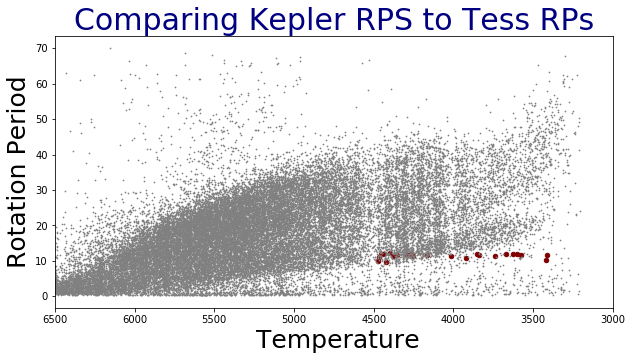

In [48]:
rot_1 = ourdata_withtemp['rp']
temp_1 = ourdata_withtemp['temp']
rot_2 = keplerdata['Prot']
temp_2 = keplerdata['Teff']

plt.figure(figsize=(10,5))
plt.scatter(temp_1,rot_1, s=20, zorder = 0, c = 'maroon')
plt.scatter(temp_2,rot_2, s=.5, zorder = 1, c = 'grey')
plt.xlabel(' Temperature', fontsize = 25)
plt.ylabel('Rotation Period', fontsize = 25) 
#plt.legend()
plt.xlim(6500,3000)
plt.title('Comparing Kepler RPS to Tess RPs', c = 'navy', fontsize = 30)

